# LETS GROW MORE
# NAME : ANAAB RAUT
# TASK 3: prediction using decision tree algorithm
# DATA SCIENCE INTERNSHIP

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
dataset= pd.read_csv("C:\\Users\\ANAAB\\Iris1.csv")

In [71]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [72]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [75]:
dataset.isnull().sum()
     

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [76]:
dataset = dataset.drop('Id',axis=1)

In [77]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


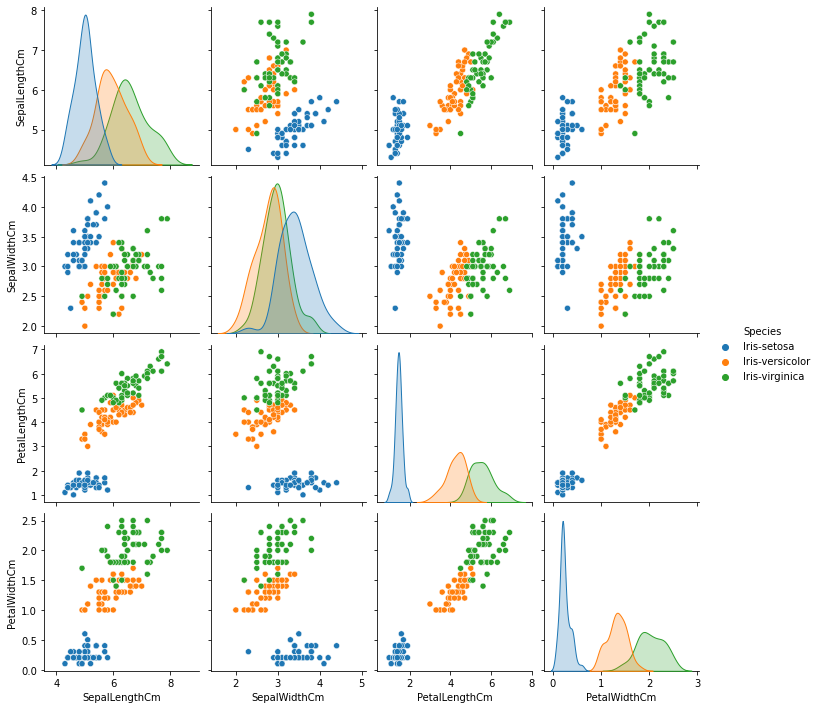

In [78]:
sns.pairplot(dataset,hue = 'Species')




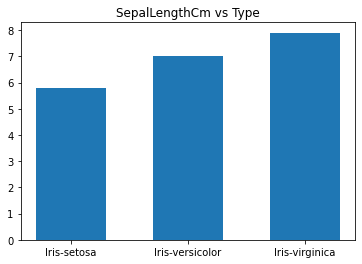

In [79]:
plt.bar(dataset['Species'],dataset['SepalLengthCm'],width = 0.6) 
plt.title("SepalLengthCm vs Type")
plt.show()

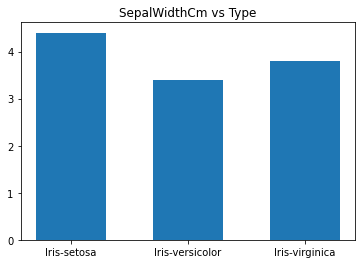

In [80]:
plt.bar(dataset['Species'],dataset['SepalWidthCm'],width = 0.6)
plt.title('SepalWidthCm vs Type')
plt.show()
     

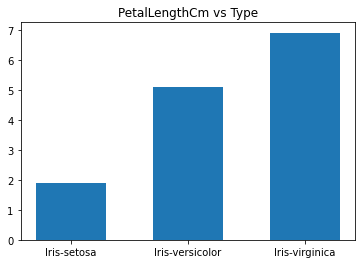

In [81]:
plt.bar(dataset['Species'],dataset['PetalLengthCm'],width = 0.6)
plt.title('PetalLengthCm vs Type')
plt.show()

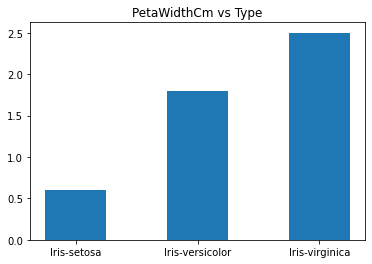

In [82]:
plt.bar(dataset['Species'],dataset['PetalWidthCm'],width = 0.5)
plt.title('PetaWidthCm vs Type')
plt.show()

In [83]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = dataset.drop('Species',axis=1)
y = dataset['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
     

In [86]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [87]:
y_train.head().reset_index()

,index,Species
0,96,Iris-versicolor
1,105,Iris-virginica
2,66,Iris-versicolor
3,0,Iris-setosa
4,122,Iris-virginica


In [88]:
y_test.head().reset_index()

,index,Species
0,73,Iris-versicolor
1,18,Iris-setosa
2,118,Iris-virginica
3,78,Iris-versicolor
4,76,Iris-versicolor


In [89]:
X_test.head().reset_index()

,index,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,73,6.1,2.8,4.7,1.2
1,18,5.7,3.8,1.7,0.3
2,118,7.7,2.6,6.9,2.3
3,78,6.0,2.9,4.5,1.5
4,76,6.8,2.8,4.8,1.4


In [90]:

X_train.head().reset_index()

,index,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,96,5.7,2.9,4.2,1.3
1,105,7.6,3.0,6.6,2.1
2,66,5.6,3.0,4.5,1.5
3,0,5.1,3.5,1.4,0.2
4,122,7.7,2.8,6.7,2.0


In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
m = DecisionTreeClassifier()

In [93]:
m.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
predict = m.predict(X_test)

In [95]:
predict

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [96]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [97]:
print(f"Accuracy: {(accuracy_score(y_test, predict))}")

Accuracy: 1.0


In [98]:
print(accuracy_score(y_test, predict)*100)
     

100.0


In [99]:
conf = confusion_matrix(y_test,predict)
print(conf)

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [100]:
print(classification_report(y_test,predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [101]:
list1 = dataset['Species'].unique().tolist()
dataset_conf= pd.DataFrame(data = conf, index = list1, columns = list1)

In [102]:
dataset_conf

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,19,0,0
Iris-versicolor,0,15,0
Iris-virginica,0,0,16


In [103]:
dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [104]:
column = dataset.columns.tolist()
print(column)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [105]:
from sklearn.tree import plot_tree

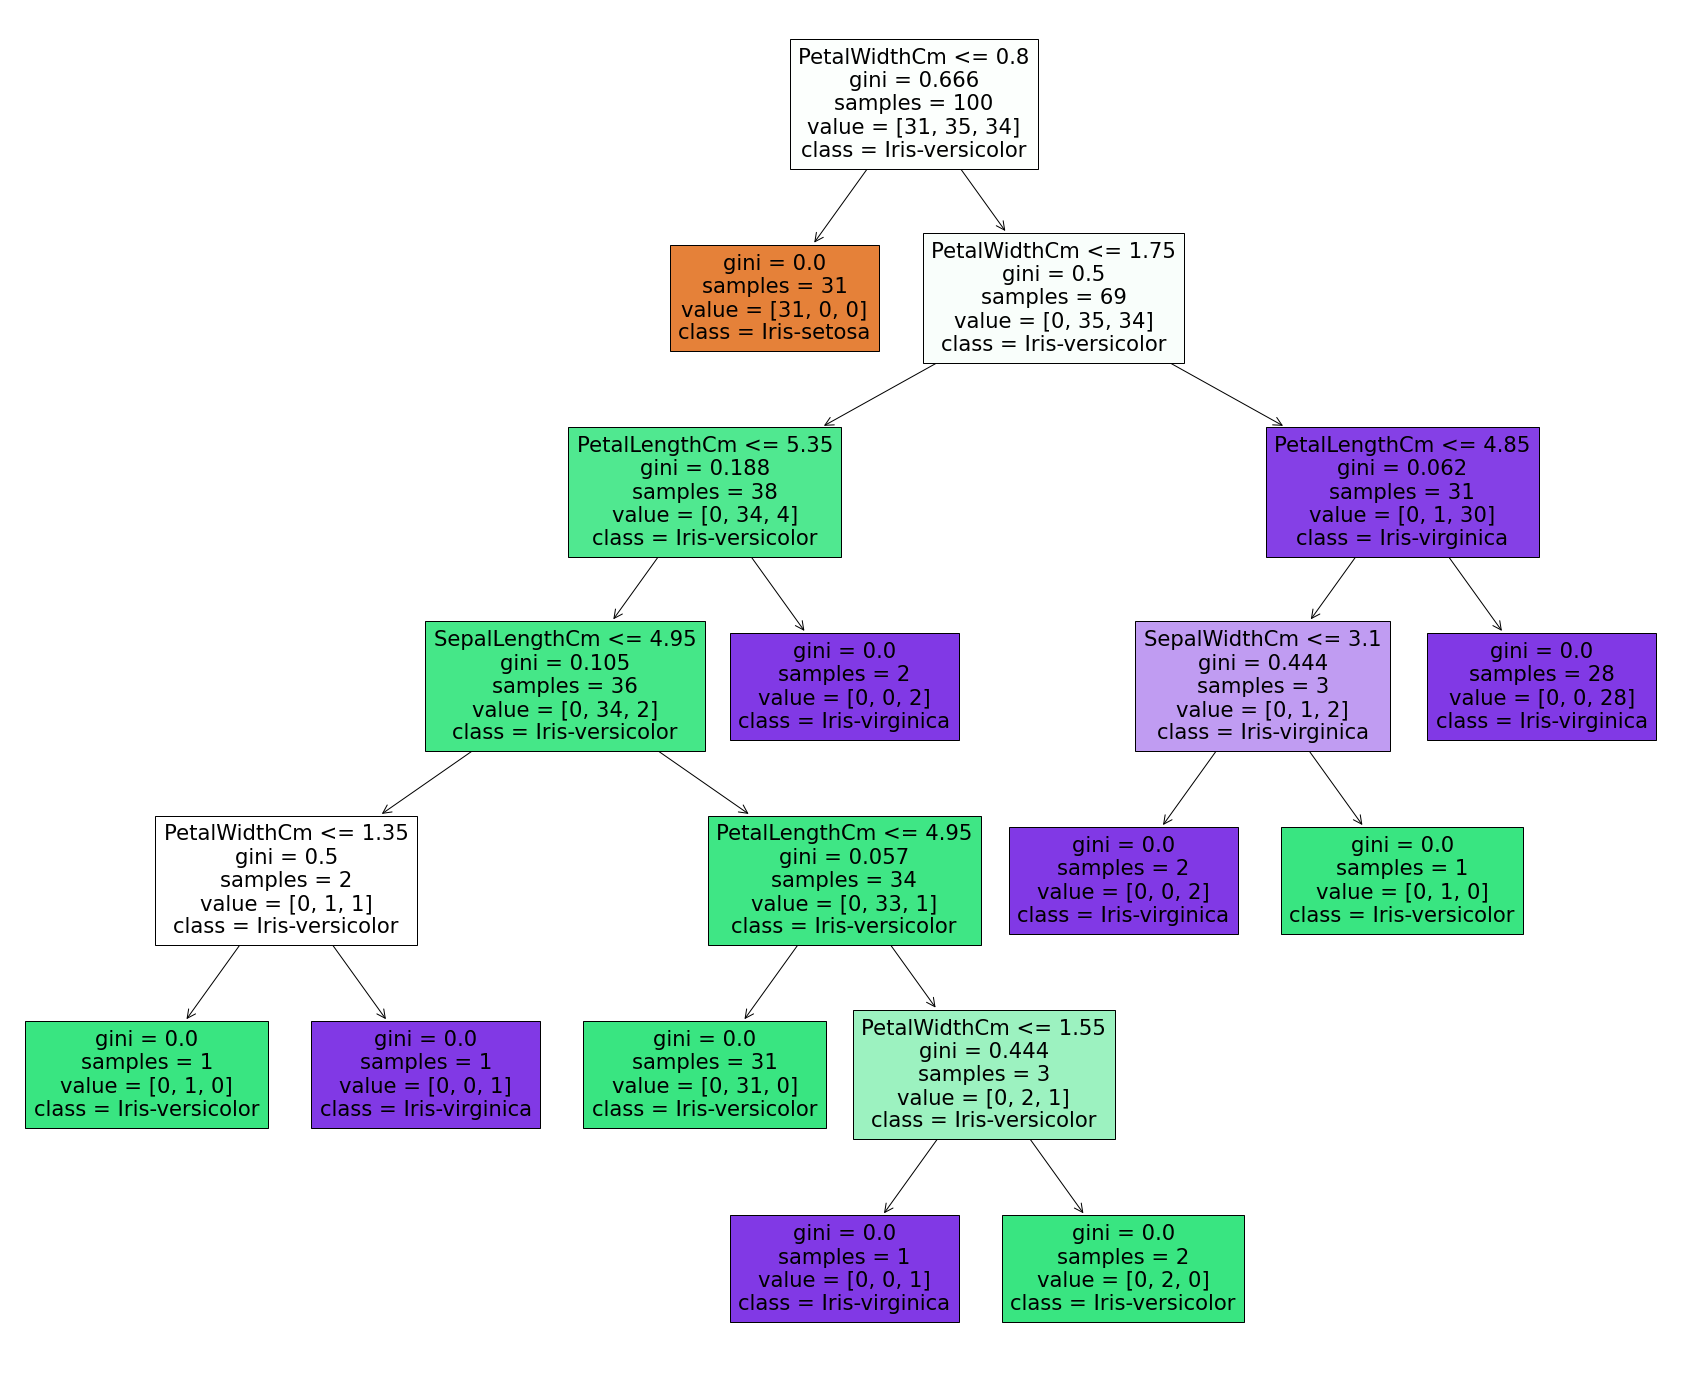

In [106]:
fig = plt.figure(figsize=(30, 25))
tree_img = plot_tree(m, feature_names = column, class_names = list1, filled = True)